Saving sales_data_multivariate (1).csv to sales_data_multivariate (1) (1).csv
Dataset Loaded:
         Date Region     Product     Category  Price  Quantity
0  2023-04-13   West  Smartphone      Gadgets    999        17
1  2023-12-15  North      Tablet  Accessories    699        13
2  2023-09-28   West  Headphones      Gadgets    499         1
3  2023-04-17   East  Smartphone  Electronics   1299         2
4  2023-03-13   East      Laptop      Gadgets   1299         9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      150 non-null    object
 1   Region    150 non-null    object
 2   Product   150 non-null    object
 3   Category  150 non-null    object
 4   Price     150 non-null    int64 
 5   Quantity  150 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.2+ KB
None

Scatterplot Matrix:


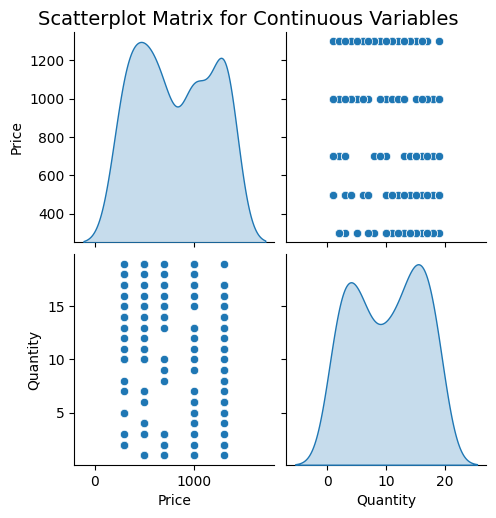


Parallel Coordinates Plot:



Line Graph:


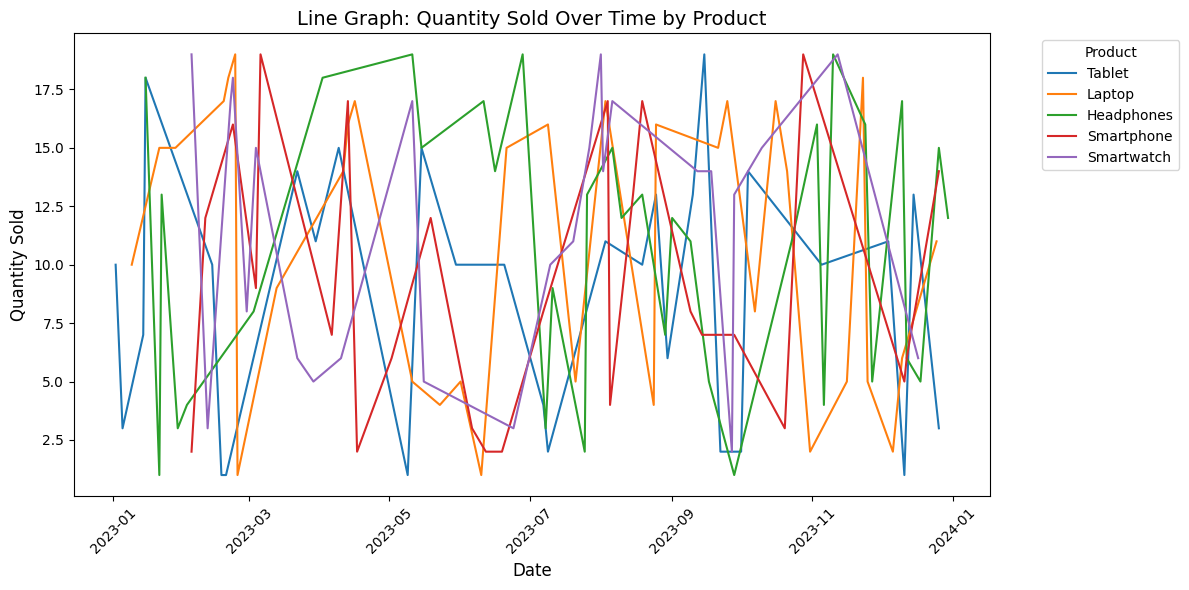


Stacked Bar Chart:


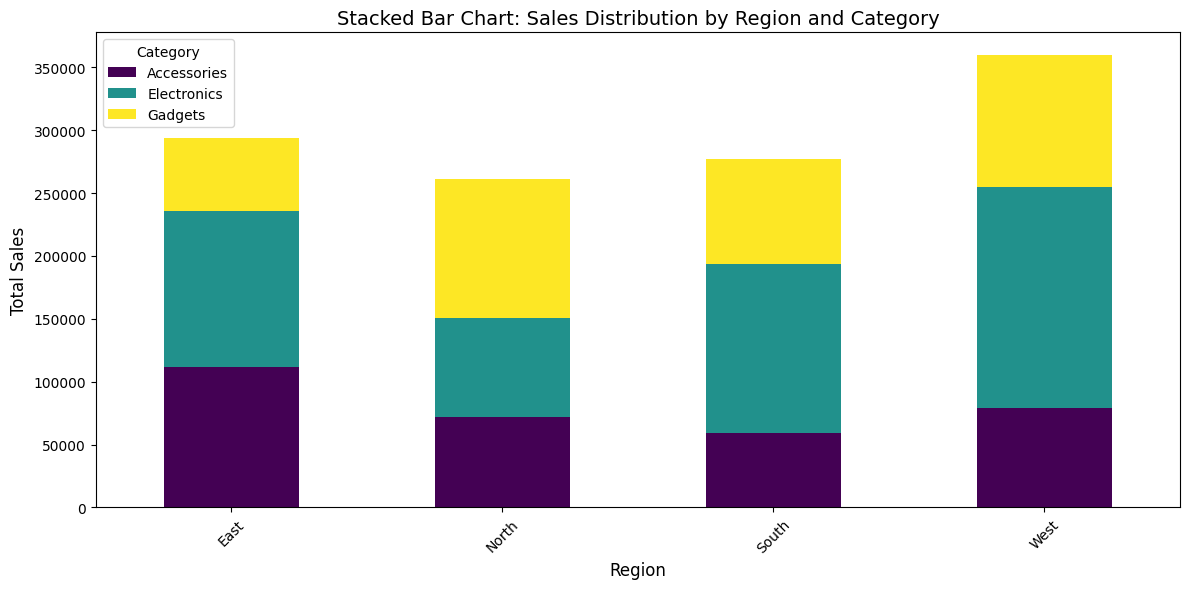

In [ ]:
!pip install pandas matplotlib seaborn plotly
from IPython import get_ipython
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv('/content/sales_data_multivariate (1).csv')

print("Dataset Loaded:")
print(df.head())
print("\nDataset Info:")
print(df.info())

df['Date'] = pd.to_datetime(df['Date'])


print("\nScatterplot Matrix:")
sns.pairplot(df[['Price', 'Quantity']], diag_kind='kde', height=2.5)
plt.suptitle("Scatterplot Matrix for Continuous Variables", y=1.02, fontsize=14)
plt.show()

print("\nParallel Coordinates Plot:")

df['Region_code'] = pd.factorize(df['Region'])[0]
'Region'
fig = px.parallel_coordinates(df,
                              dimensions=['Price', 'Quantity'],
                              color='Region_code',
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              labels={"Price": "Price", "Quantity": "Quantity"},
                              title="Parallel Coordinates Plot")
fig.show()

print("\nLine Graph:")
df_grouped = df.groupby(['Date', 'Product'])['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Date', y='Quantity', hue='Product', palette='tab10')
plt.title('Line Graph: Quantity Sold Over Time by Product', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nStacked Bar Chart:")
df['Sales'] = df['Price'] * df['Quantity']
df_stacked = df.groupby(['Region', 'Category'])['Sales'].sum().unstack()
df_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart: Sales Distribution by Region and Category', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()